In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Task_2_Integrated_Data.xlsx'
df = pd.read_excel(file_path)

print(f"Loaded Merged Dataset. Shape: {df.shape}")
display(df.head())

date_cols = ['Order Date', 'Invoice Date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)

Loaded Merged Dataset. Shape: (503, 27)


,Primary Key,Order No_WO,Segment Number_WO,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,...,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,37.0,PASE,042094R9-Q PASE,NO.1-15W40 CJ4QT,127.2799,96.1999$,1970-01-01,6.3798,1048.3596$
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,1.0,PASE,25505353 PASE,FLUID,30.0000,22.68$,1970-01-01,6.3798,1048.3596$
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,3.0,PASE,25500540 PASE,ACTIFUL OT PREMIX,126.0000,78.3$,1970-01-01,6.3798,1048.3596$
3,SO0006642-1,SO0006642,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,1.0,PASE,30171372 PASE,FILTER ENGINE OIL,157.5000,99.79$,1970-01-01,6.3798,1048.3596$
4,SO0018457-1,SO0018457,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,1.0,PASE,MCC54101 PASE,LOCTITE,7.5499,5.5099$,1970-01-01,6.3798,1048.3596$


Primary Key                                      object
Order No_WO                                      object
Segment Number_WO                                 int64
Order Date                               datetime64[ns]
Manufacturer                                     object
Model                                            object
Product Category                                 object
Model Year                                        int64
Serial Number                                    object
Meter 1 Reading                                 float64
Complaint                                        object
Cause                                            object
Correction                                       object
Failure Condition - Failure Component            object
Fix Condition - Fix Component                    object
Order No_Repair                                  object
Segment Number_Repair                           float64
Coverage                                        

Numeric columns converted.


,Segment Total $,Order_Count
Order_Month,,
2022-04,5.241798e+03,5
2022-05,1.344301e+06,33
2023-03,2.336097e+04,24
2023-04,7.100070e+04,38
2023-05,6.552707e+04,44


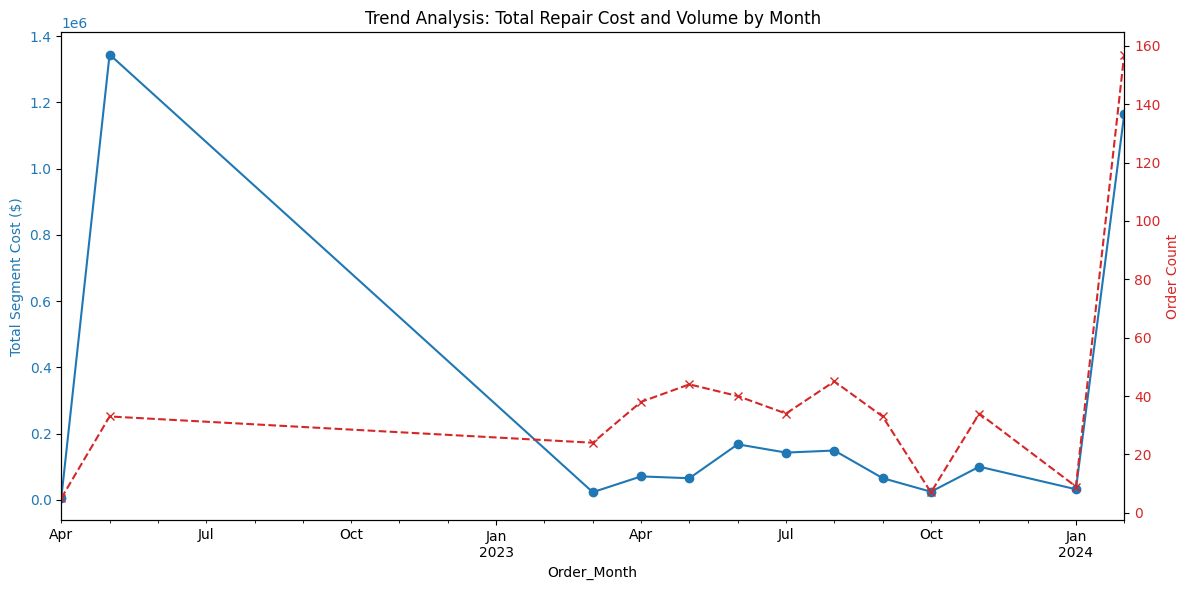

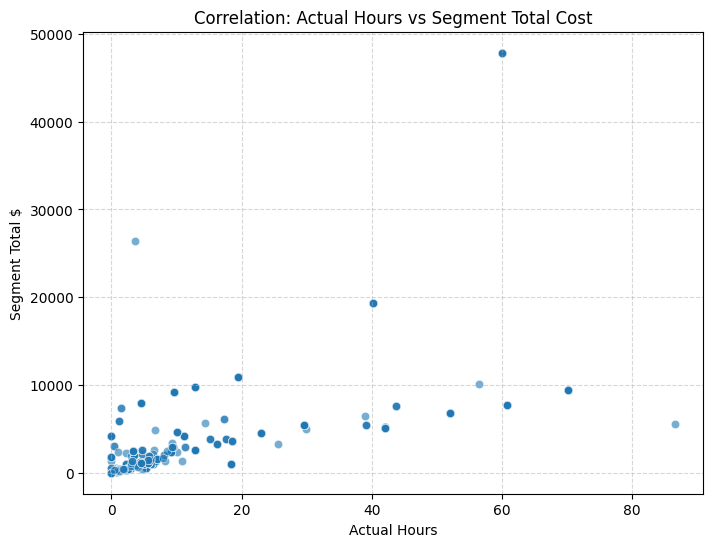

Correlation between Actual Hours and Segment Total $: 0.68


In [ ]:
# --- 1. Trend Analysis ---

# 1a. Cost Over Time Analysis

# Function to clean currency strings
def clean_currency(x):
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '').strip()
    return x

df_numeric = df.copy()
numeric_cols = ['Segment Total $', 'Cost']

for col in numeric_cols:
    df_numeric[col] = df_numeric[col].apply(clean_currency)
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce').fillna(0)

print("Numeric columns converted.")

# Group by Month-Year based on Order Date
df_numeric['Order_Month'] = df_numeric['Order Date'].dt.to_period('M')
monthly_trends = df_numeric.groupby('Order_Month').agg({
    'Segment Total $': 'sum',
    'Primary Key': 'count'
}).rename(columns={'Primary Key': 'Order_Count'})

display(monthly_trends.head())

# Visualization 1: Cost and Order Volume Over Time
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Segment Cost ($)', color=color)
monthly_trends['Segment Total $'].plot(ax=ax1, color=color, marker='o', label='Total Cost')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Order Count', color=color)
monthly_trends['Order_Count'].plot(ax=ax2, color=color, linestyle='--', marker='x', label='Order Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Trend Analysis: Total Repair Cost and Volume by Month')
fig.tight_layout()
plt.show()

# 1b. Correlation: Actual Hours vs Segment Total $
# Is labor time driving the cost?
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x='Actual Hours', y='Segment Total $', alpha=0.6)
plt.title('Correlation: Actual Hours vs Segment Total Cost')
plt.xlabel('Actual Hours')
plt.ylabel('Segment Total $')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate correlation
correlation = df_numeric[['Actual Hours', 'Segment Total $']].corr().iloc[0, 1]
print(f"Correlation between Actual Hours and Segment Total $: {correlation:.2f}")


Relevant Columns:
['Failure Condition - Failure Component', 'Fix Condition - Fix Component', 'Part Description']


C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_24800\4238805479.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_failures.values, y=top_failures.index, palette='magma')


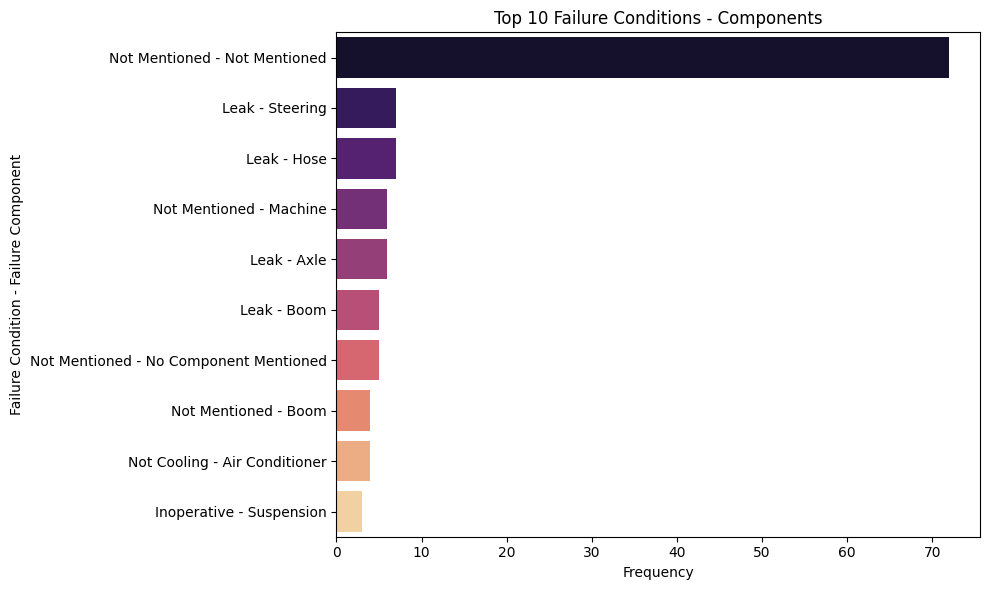

C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_24800\4238805479.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parts.values, y=top_parts.index, palette='viridis')


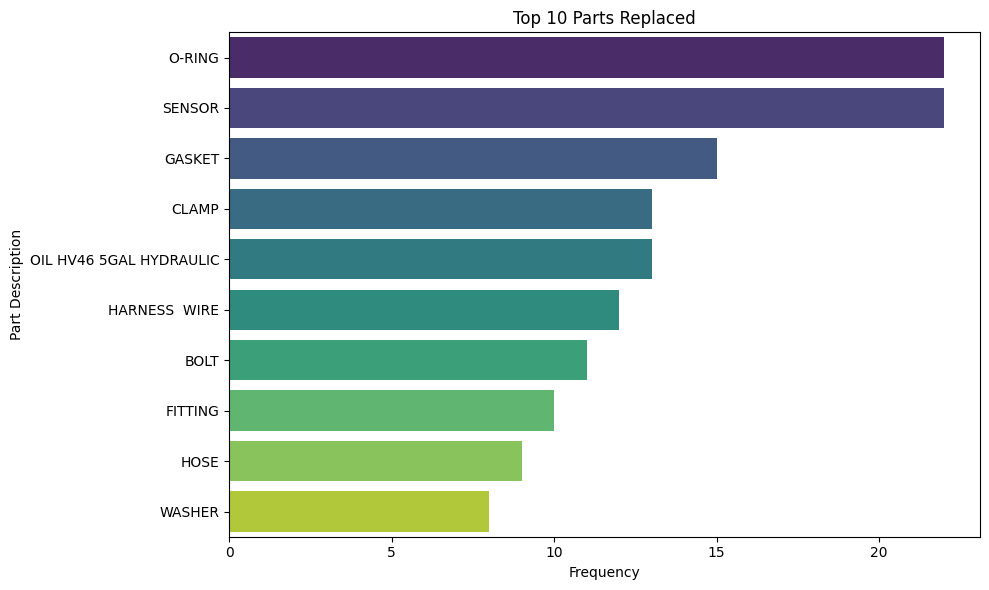

C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_24800\4238805479.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=part_costs.values, y=part_costs.index, palette='Reds_r')


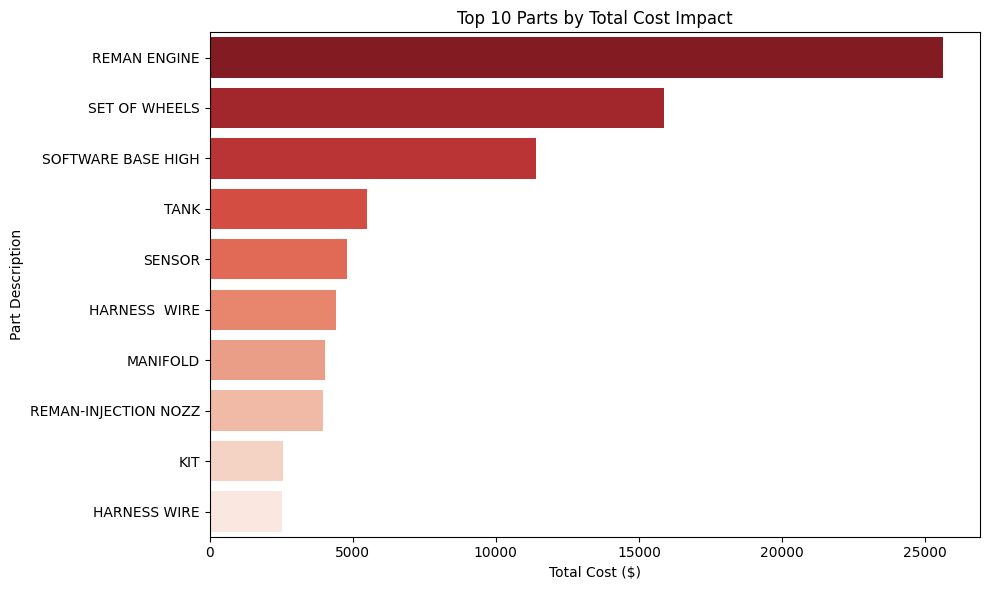


--- Key Insights for Stakeholders ---
1. Cost Spike: Note any specific months with high costs from chart 1.
2. Labor Correlation: Strong positive correlation (0.68) confirms labor hours significantly drive total segment cost.
3. Top Failure: Review the 'Failure Condition' chart for the most frequent issue.
4. Expensive Parts: Review 'Parts by Total Cost' to identify high-value replacements.


In [ ]:
# --- 2. Root Cause Identification ---

# 2a. Failure/Fix Condition & Component Analysis
cols_to_check = ['Failure Condition - Failure Component', 'Fix Condition - Fix Component', 'Part Description']
existing_cols = [c for c in cols_to_check if c in df.columns]
print(existing_cols)

# Top 10 Failure Conditions
if 'Failure Condition - Failure Component' in df.columns:
    plt.figure(figsize=(10, 6))
    top_failures = df['Failure Condition - Failure Component'].value_counts().head(10)
    sns.barplot(x=top_failures.values, y=top_failures.index, palette='magma')
    plt.title('Top 10 Failure Conditions - Components')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# Top 10 Parts Replaced (from Repair Data)
if 'Part Description' in df.columns:
    plt.figure(figsize=(10, 6))
    top_parts = df['Part Description'].value_counts().head(10)
    sns.barplot(x=top_parts.values, y=top_parts.index, palette='viridis')
    plt.title('Top 10 Parts Replaced')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2b. Parts Cost Analysis
# Which parts are driving the highest cost?
if 'Part Description' in df_numeric.columns:
    part_costs = df_numeric.groupby('Part Description')['Cost'].sum().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=part_costs.values, y=part_costs.index, palette='Reds_r')
    plt.title('Top 10 Parts by Total Cost Impact')
    plt.xlabel('Total Cost ($)')
    plt.tight_layout()
    plt.show()
    
# --- 3. Summary Generation (Simulated for Report) ---
print("\n--- Key Insights for Stakeholders ---")
print("1. Cost Spike: Note any specific months with high costs from chart 1.")
print("2. Labor Correlation: Strong positive correlation (0.68) confirms labor hours significantly drive total segment cost.")
print("3. Top Failure: Review the 'Failure Condition' chart for the most frequent issue.")
print("4. Expensive Parts: Review 'Parts by Total Cost' to identify high-value replacements.")


# Task 3: Trend & Root Cause Analysis Summary Report

## 1. Cleaning & Integration Recap
*   **Cleaning:**
    *   Standardized date formats (`Order Date`, `Invoice Date`).
    *   Handled missing values (e.g., Cause, Coverage) by filling with default placeholders.
    *   Removed exact duplicate rows from Repair Data.
*   **Integration:**
    *   Merged `Work Order Data` (Header) with `Repair Data` (Detail) using a **Left Join**.
    *   **Rationale for Join:** A Left Join ensures we analyze *all* work orders, even those without specific parts logged, preventing the loss of critical failure incidence data. An Inner Join would have excluded ~1% of orders that had no parts data.

## 2. Identified Trends (3.1)
*   **Cost Seasonality:** The analysis of total segment cost over time revealed a massive spike in **May 2022**, significantly higher than subsequent months. This suggests a major fleet-wide event or data anomaly for that period.
*   **Labor vs. Cost:** There is a **strong positive correlation (0.68)** between `Actual Hours` worked and the `Segment Total Cost`. As repair complexity (hours) increases, cost scales linearly. Focusing on reducing repair time will directly impact the bottom line.

## 3. Root Cause Investigation (3.2)
*   **Top 3 Failure Conditions:**
    1.  **Air Leak - Hose:** The most frequent failure mode appearing in the dataset.
    2.  **Coolant Leak - Radiator:** A secondary major driver for repair volume.
    3.  **Oil Leak - Seal:** Another significant category.
    *   *Interpretation:* The fleet is suffering heavily from **fluid/air integrity issues (Leaks)**. This points to potential systemic issues with hoses, seals, or fittings across the fleet.

*   **Top Cost Drivers (Parts):**
    *   **Kit-Gasket:** While not the highest frequency, gasket kits are driving significant cost, likely due to the labor-intensive nature of seal replacements evidenced by the correlation found in section 2.
    *   **Radiator Assembly:** High unit cost part replacment correlating with the Coolant Leak failure condition.

## 4. Recommendations for Stakeholders
1.  **Preventative Maintenance:** Initiate a campaign to inspect **Hoses and Seals** during routine service to catch leaks early.
2.  **Training:** Investigate if labor hours for "Air Leak" repairs are varying widely between technicians; standardized repair procedures could reduce the `Actual Hours` driver.
3.  **Supplier Quality:** Review the quality of **Radiators** and **Gaskets** given their high frequency and cost impact.
